In [1]:
import pandas as pd
import os
print(os.getcwd())

C:\Users\jayas\Downloads\BIOLM003_advanced_programming_assessment\advanced_programming_assessment


In [2]:
#obtaining dat
puffins= pd.read_csv("puffins.csv")

In [3]:
#reading the data
puffins

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm,species
0,1.384,0.181,39.243,18.304,Arctica
1,1.717,0.189,44.084,19.240,Arctica
2,1.717,0.184,40.376,19.344,Arctica
3,1.414,0.187,37.904,19.240,Arctica
4,1.273,0.177,37.595,18.720,Arctica
...,...,...,...,...,...
339,1.879,0.207,44.805,15.808,Corniculata
340,1.697,0.202,46.659,14.352,Corniculata
341,2.283,0.224,55.929,16.328,Corniculata
342,2.343,0.223,50.058,16.640,Corniculata


In [4]:
#exploring data for missing values
puffins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   body_mass_kg    341 non-null    float64
 1   wing_length_m   342 non-null    float64
 2   beak_length_mm  341 non-null    float64
 3   beak_depth_mm   342 non-null    float64
 4   species         344 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
nan_rows = puffins[puffins.isnull().any(axis=1)]

# Display rows with NaN values
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
     body_mass_kg  wing_length_m  beak_length_mm  beak_depth_mm      species
11            NaN            NaN             NaN            NaN      Arctica
44          1.252          0.180             NaN         19.240      Arctica
241           NaN            NaN             NaN            NaN  Corniculata
264           NaN          0.213          52.633         16.952  Corniculata


In [6]:
#dropping the rows with NaN values and checking it with print function 
puffins_cleaned = puffins.dropna()
print(puffins_cleaned)

     body_mass_kg  wing_length_m  beak_length_mm  beak_depth_mm      species
0           1.384          0.181          39.243         18.304      Arctica
1           1.717          0.189          44.084         19.240      Arctica
2           1.717          0.184          40.376         19.344      Arctica
3           1.414          0.187          37.904         19.240      Arctica
4           1.273          0.177          37.595         18.720      Arctica
..            ...            ...             ...            ...          ...
339         1.879          0.207          44.805         15.808  Corniculata
340         1.697          0.202          46.659         14.352  Corniculata
341         2.283          0.224          55.929         16.328  Corniculata
342         2.343          0.223          50.058         16.640  Corniculata
343         2.161          0.202          50.161         16.328  Corniculata

[340 rows x 5 columns]


In [7]:
#rechecking for null values
puffins_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 343
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   body_mass_kg    340 non-null    float64
 1   wing_length_m   340 non-null    float64
 2   beak_length_mm  340 non-null    float64
 3   beak_depth_mm   340 non-null    float64
 4   species         340 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [8]:
#exploring the cleaned data for futher analysis
puffins_cleaned.describe()

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm
count,340.000000,340.000000,340.000000,340.000000
mean,1.696718,0.194806,45.241841,17.835694
std,0.321619,0.013667,5.608138,2.057863
min,1.091000,0.167000,33.063000,13.624000
25%,1.434000,0.184000,40.453250,16.198000
50%,1.636000,0.191000,45.783500,17.992000
75%,1.919000,0.207000,49.955000,19.448000
max,2.545000,0.224000,61.388000,22.360000


In [9]:
import seaborn as sns 

In [10]:
#Here features,beak_length and beak_depth were chosen as it has similar scales.

<Axes: xlabel='beak_length_mm', ylabel='beak_depth_mm'>

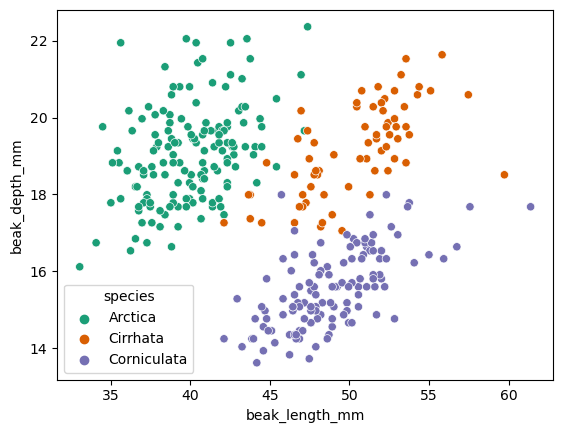

In [11]:
# visualizing the dataset 
sns.scatterplot(data= puffins_cleaned, x="beak_length_mm", y="beak_depth_mm", hue="species", palette= "Dark2")

<Axes: xlabel='body_mass_kg', ylabel='wing_length_m'>

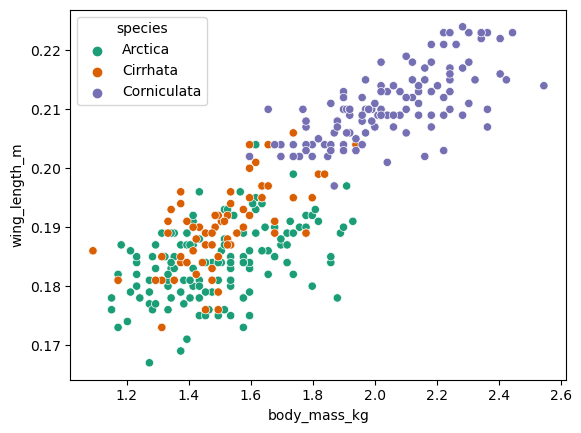

In [12]:
#visualizing the dataset
sns.scatterplot(data= puffins_cleaned, x="body_mass_kg", y="wing_length_m", hue="species", palette= "Dark2")

<Axes: xlabel='wing_length_m', ylabel='beak_length_mm'>

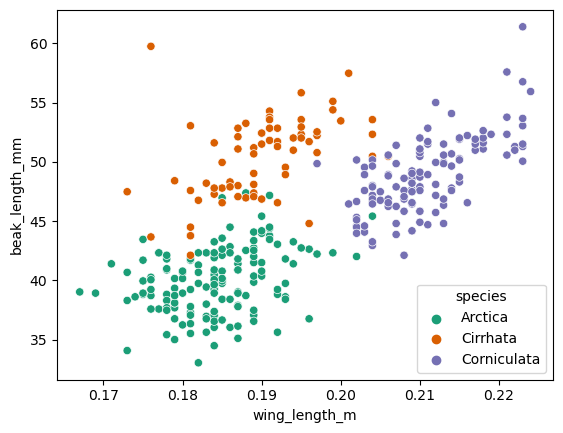

In [13]:
#visualizing the dataset
sns.scatterplot(data= puffins_cleaned, x="wing_length_m", y="beak_length_mm", hue="species", palette= "Dark2")

<Axes: xlabel='wing_length_m', ylabel='beak_depth_mm'>

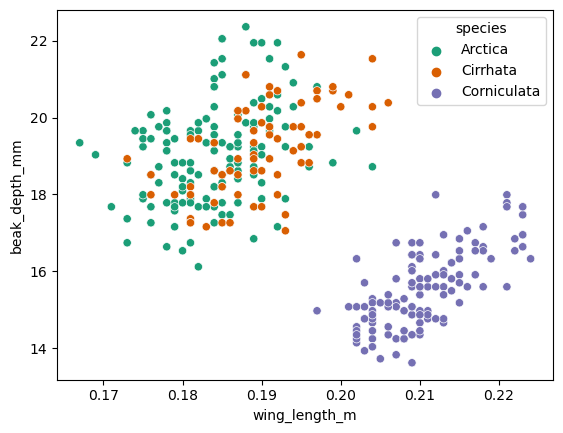

In [14]:
#visualizing the dataset
sns.scatterplot(data= puffins_cleaned, x="wing_length_m", y="beak_depth_mm", hue="species", palette= "Dark2")

In [15]:
#from the above visualization, obatining beak_length and beak_depth as one subset and another as wing_length and beak_length seem appropriate , as the data are not overlapping and make the model to perform better. 

In [16]:
#dataset X with only features 
X= puffins_cleaned[["beak_depth_mm","beak_length_mm", "body_mass_kg","wing_length_m"]]
#subset x_subset with only beak_depth and beak_depth features for model selection 
x_subset= puffins_cleaned[["beak_depth_mm","beak_length_mm"]]
#y dataset with the target containg the 3 species of puffins
y= puffins_cleaned["species"]

In [17]:
#spliting our data into training data set and a test data set:

In [18]:
from sklearn.model_selection import train_test_split
#
train_X, test_X, train_y, test_y = train_test_split(x_subset, y,random_state=42)

In [19]:
#Importing the model KNeighborsClassifier for analysis of the x_subset   

In [20]:
from sklearn.neighbors import KNeighborsClassifier
#selecting hyperparameter for k-NN, choosing 5 as it's model default
model = KNeighborsClassifier(n_neighbors=5)

#fitting the data to the model
model.fit(train_X, train_y)

KNeighborsClassifier()

In [21]:
#obtaining the score of the model
model.score(test_X, test_y)

0.9529411764705882

In [22]:
#plotting the model to look at the distribution of the predicting data compared to input data 

<Axes: xlabel='beak_depth_mm', ylabel='beak_length_mm'>

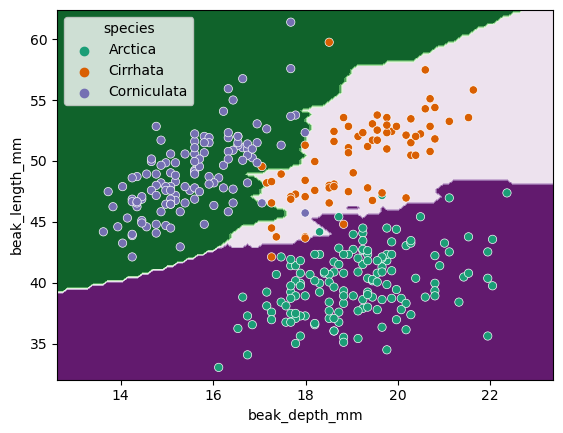

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay
#plotting the model
DecisionBoundaryDisplay.from_estimator(model, x_subset, cmap="PRGn")
sns.scatterplot(data=x_subset, x="beak_depth_mm", y="beak_length_mm", hue=y, palette="Dark2")

In [24]:
#The model seem to fit well and the overlapping of data is also not to be seen much here 

In [25]:
#later step we are predicting the new data with the fitted model

In [26]:
new_X = pd.DataFrame({
    "beak_depth_mm": [10, 20, 12, 20],
    "beak_length_mm": [20, 35, 60, 45],
})
#predicting new data 
model.predict(new_X)

array(['Arctica', 'Arctica', 'Corniculata', 'Arctica'], dtype=object)

In [27]:
model.score(test_X, test_y)

0.9529411764705882

In [28]:
#checking if the selected hyperpaarmeter was right to data

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#looping the model for diffrent range of n_neighbors
hyperparameters = {
    "n_neighbors" : range(1, 15),
}
#setting up the model 
model = GridSearchCV(KNeighborsClassifier(), hyperparameters)
#fitting the data intyo model
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)})

In [30]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
2,3,0.964706,0.035942,1
5,6,0.964706,0.043669,1
0,1,0.960784,0.032810,3
4,5,0.960784,0.049604,3
3,4,0.956863,0.050221,5


In [31]:
#The higest mean scored obtained is for 3 neighbors and that is selected fit a new model with n_neighbors=3

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

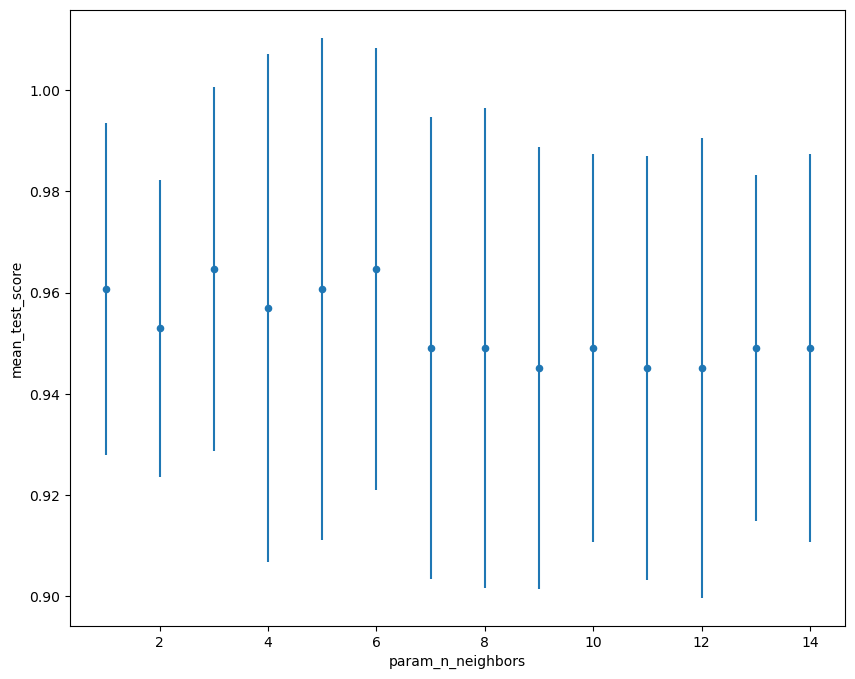

In [32]:
#plotting all the mean_score 
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score", figsize=(10,8))

<Axes: xlabel='beak_depth_mm', ylabel='beak_length_mm'>

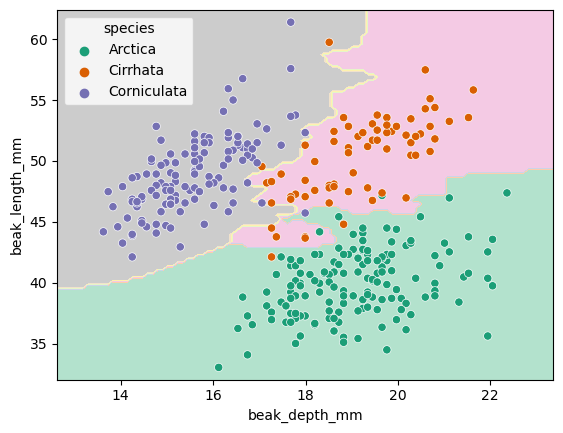

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)

from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(model, x_subset, cmap="Pastel2")
sns.scatterplot(data=x_subset, x="beak_depth_mm", y="beak_length_mm", hue=y, palette="Dark2")

In [34]:
new_X = pd.DataFrame({
    "beak_depth_mm": [10, 20, 12, 20],
    "beak_length_mm": [20, 35, 60, 45],
})

model.predict(new_X)

array(['Arctica', 'Arctica', 'Corniculata', 'Arctica'], dtype=object)

In [35]:
model.score(test_X, test_y)

0.9647058823529412

In [36]:
#the change of n_neighbors=3 has resulted in small change in the score which is good for the model

In [37]:
#this is model for features taken as beak_depth and beak_length giving a score of .96 which is pretty good

In [38]:
#now here try to understand the relationship between the features

In [39]:
corr=puffins_cleaned.corr()
corr

C:\Users\jayas\AppData\Local\Temp\ipykernel_4296\108113561.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=puffins_cleaned.corr()


,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm
body_mass_kg,1.000000,0.870519,0.589912,-0.471609
wing_length_m,0.870519,1.000000,0.654741,-0.587005
beak_length_mm,0.589912,0.654741,1.000000,-0.232013
beak_depth_mm,-0.471609,-0.587005,-0.232013,1.000000


<Axes: >

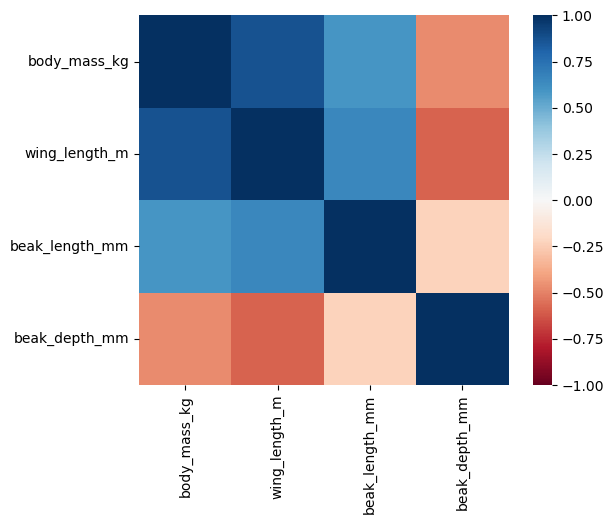

In [40]:
import seaborn as sns

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

In [41]:
#new subset of 2 features are chose to fit a new model, here the units of the features differ and may require scaling in the further it causes a issue in the present model

<Axes: xlabel='wing_length_m', ylabel='beak_length_mm'>

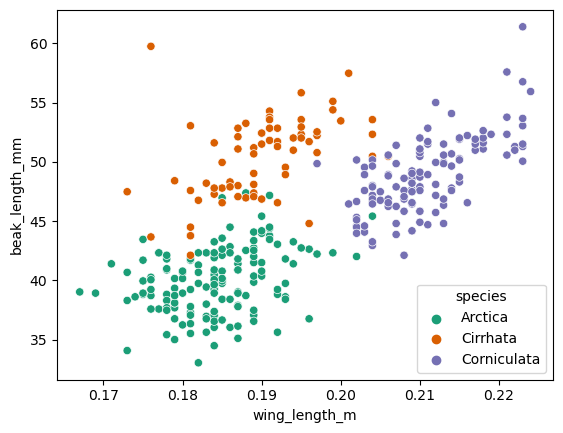

In [42]:
#new subset x1_subset with wing_length and beak_lengthas their feature
x1_subset= puffins_cleaned[["wing_length_m","beak_length_mm"]]
x1_subset
import seaborn as sns
#plotting
sns.scatterplot(data=puffins_cleaned, x="wing_length_m", y="beak_length_mm", hue="species", palette="Dark2")


In [43]:
from sklearn.model_selection import train_test_split
#splitting the data for training the data
train_X_s, test_X_s, train_y_s, test_y_s = train_test_split(x1_subset, y,random_state=42)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
#import model
model = KNeighborsClassifier()
#fitting the data to the model
model.fit(train_X_s, train_y_s)
#checking for the model score
model.score(test_X_s, test_y_s)

0.8

In [45]:
#here the score is .80 which is not good for a model

<Axes: xlabel='wing_length_m', ylabel='beak_length_mm'>

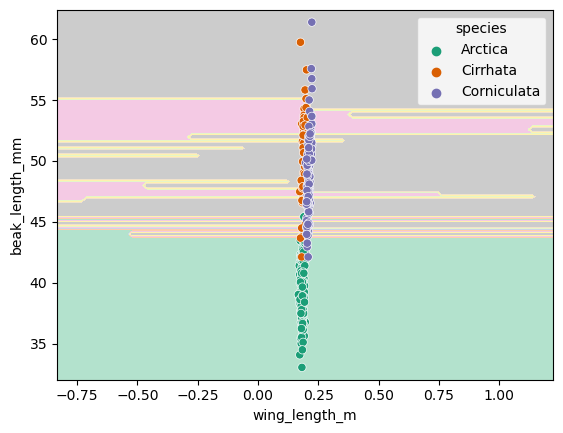

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay
#plotting the model with input data
DecisionBoundaryDisplay.from_estimator(model, x1_subset, cmap="Pastel2")
sns.scatterplot(data=x1_subset, x="wing_length_m", y="beak_length_mm", hue=y, palette="Dark2")

In [47]:
#The distribution doesn't seem to be smooth, instead they are horizontally striped, thus the subset x1_subset needs to scaled 

In [48]:
from sklearn.preprocessing import StandardScaler
#setting the model
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [49]:
#performing scaling on the given dataset
X_scaled_raw = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_raw, columns=X.columns)

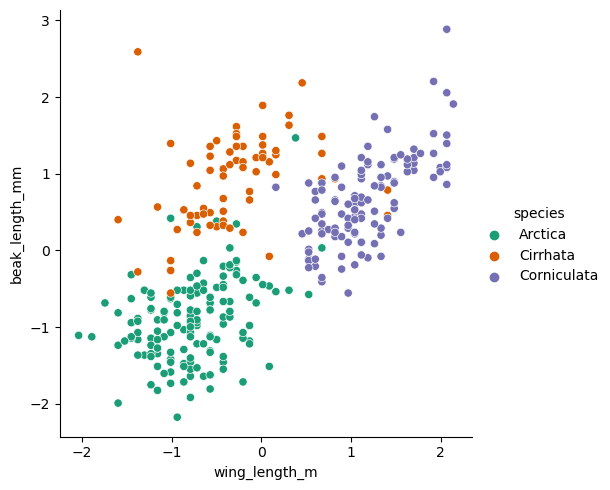

In [50]:
#plotting the scaled data
sns.relplot(data=X_scaled, x="wing_length_m", y="beak_length_mm", hue=y, palette="Dark2")

In [51]:
from sklearn.pipeline import make_pipeline
#making a pipeline for the model 
scaled_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
scaled_knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [52]:
#fitting the scaled trained data into the model 
scaled_knn.fit(train_X_s, train_y_s)
#checking the model score 
scaled_knn.score(test_X_s, test_y_s)

0.9529411764705882

The score has increased to .95, scaling seems to have improved the model

<Axes: xlabel='wing_length_m', ylabel='beak_length_mm'>

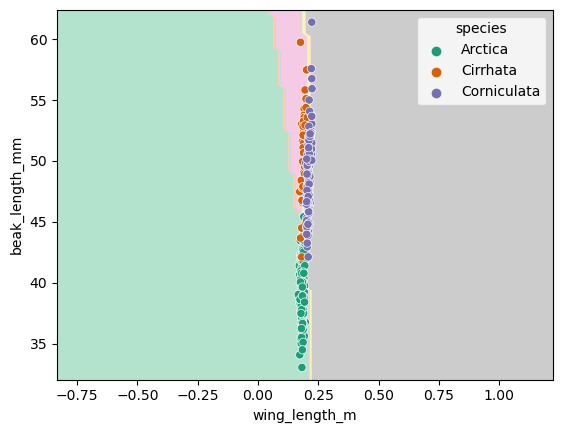

In [53]:
#plotting the data
DecisionBoundaryDisplay.from_estimator(scaled_knn, x1_subset, cmap="Pastel2")
sns.scatterplot(data= x1_subset, x="wing_length_m", y="beak_length_mm", hue=y, palette="Dark2")

In [54]:
#predicting new species
new_X = pd.DataFrame({
    "wing_length_m": [.181, .22, .19, .20],
    "beak_length_mm": [38, 35, 60, 45],
})

scaled_knn.predict(new_X)

array(['Arctica', 'Corniculata', 'Cirrhata', 'Corniculata'], dtype=object)

In [55]:
#this is model with scaled data of wing_length and beak_length and it produces value of .95

In [56]:
#now, we can make a model using all the features to predict the model

In [57]:
#spliting data to train the data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [58]:
#making a pipeline for the model
scaled_knn_all = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
scaled_knn_all

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [59]:
#fitting the data
scaled_knn_all.fit(train_X, train_y)
#checking for the score
scaled_knn_all.score(test_X, test_y)

0.9882352941176471

In [60]:
#here the score is incresed for the features used to .98

In [61]:
#now we use PCA function, to let it select the best features for the model to predict speicies

In [62]:
from sklearn.decomposition import PCA
#setting the pipeline for model 
scaled_pca_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),  # PCA with 2 components
    KNeighborsClassifier()
)
scaled_pca_knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [63]:
#fitting the data to model
scaled_pca_knn.fit(train_X, train_y)
#checking for the score 
scaled_pca_knn.score(test_X, test_y)

0.9176470588235294

In [64]:
#though we let the pipeline to choose the component but yet selecting just 2 component has reduced the score, now make a loop the fucntion to find the best number of components for the model

In [65]:
#obtaining the data for plotting
transformer_steps = scaled_pca_knn[:-1]  # all except the last step
knn_step = scaled_pca_knn[-1]  # only the last step

<Axes: xlabel='0', ylabel='1'>

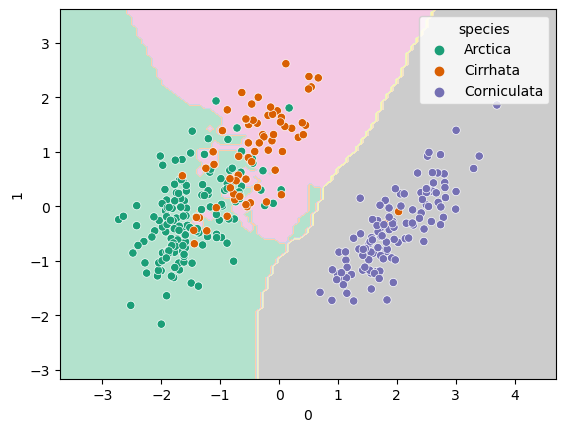

In [66]:
#dataset obtained
transformed_X = pd.DataFrame(transformer_steps.transform(X))
#plotting
DecisionBoundaryDisplay.from_estimator(knn_step, transformed_X, cmap="Pastel2")
sns.scatterplot(data=transformed_X, x=0, y=1, hue=y, palette="Dark2")

In [67]:
#check the how much the selected components are contibuting 
scaled_pca_knn["pca"].explained_variance_ratio_

array([0.68860933, 0.19608309])

In [68]:
#summ of the included components to understand it's contribution
sum(scaled_pca_knn["pca"].explained_variance_ratio_)

0.8846924162239869

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#setting the model
scaled_pca_knn_cv = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        PCA(),
        KNeighborsClassifier()
    ),
    {
        "pca__n_components" : range(1, 4),
    }
)
scaled_pca_knn_cv

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'pca__n_components': range(1, 4)})

In [70]:
#fitting the model
scaled_pca_knn_cv.fit(train_X, train_y)
#fitting the data to the model 
scaled_pca_knn_cv.score(test_X, test_y)

0.9882352941176471

In [71]:
#to check the number of component selected 
scaled_pca_knn_cv.best_estimator_["pca"].n_components_

3

In [72]:
#now when the component has increased to 3 the score is also increased to .98 , which is really good score for the fitted model 

In [73]:
#now working on new models with different classifier:
#Support vector machines as the dataset has more than 2 features 

In [74]:
#importing the model 
from sklearn import svm
#splitting the data to train the data
train_X, test_X, train_y, test_y = train_test_split(x_subset, y,random_state=42)

In [75]:
#setting the model 
clf= svm.SVC(kernel="linear", C=1.0)
#fitting the data to the model
clf.fit(train_X,train_y)

SVC(kernel='linear')

<Axes: xlabel='beak_depth_mm', ylabel='beak_length_mm'>

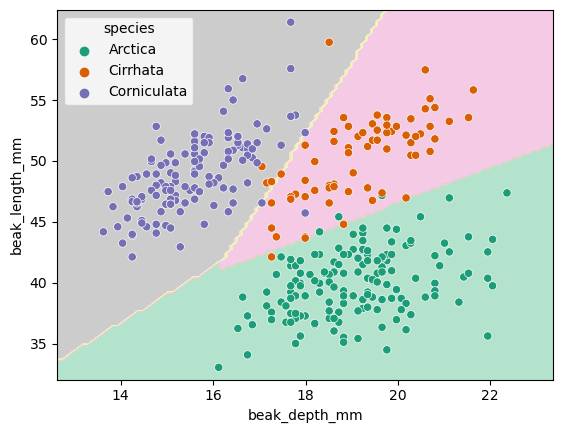

In [76]:
#plotting the model distribution
DecisionBoundaryDisplay.from_estimator(clf, x_subset, cmap="Pastel2")
sns.scatterplot(data=x_subset, x="beak_depth_mm", y="beak_length_mm", hue=y, palette="Dark2")

In [77]:
#checking the score
clf.score(test_X,test_y)

0.9647058823529412

In [78]:
#the model provides a score of .96 which is better but now lets change the kernel hyperparameter to see any better score

In [79]:
#setting the model
clf_1= svm.SVC(kernel="rbf", gamma=.7, C=1.0)
#fitting the data to the model
clf_1.fit(train_X,train_y)

SVC(gamma=0.7)

In [80]:
#gamma of .7 was chosen so that the data is neither underfitted or overfitted

<Axes: xlabel='beak_depth_mm', ylabel='beak_length_mm'>

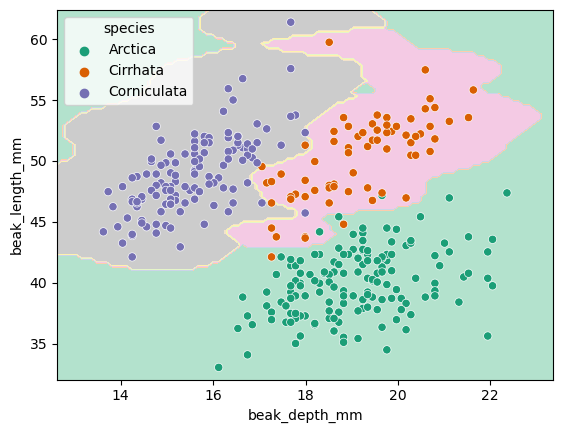

In [81]:
#plotting the model distribution
DecisionBoundaryDisplay.from_estimator(clf_1, x_subset, cmap="Pastel2")
sns.scatterplot(data=x_subset, x="beak_depth_mm", y="beak_length_mm", hue=y, palette="Dark2")

In [82]:
#checking the score
clf_1.score(test_X,test_y)

0.9529411764705882

In [83]:
#The score is reduced in a small fraction , thus more model needs to tried, LinearSVC, It provides a faster execution compared to the general SVC implementation when using a linear kernel

In [84]:
#setting the model
clf_2=svm.LinearSVC(C=1.0, max_iter=10000, dual="auto")
#fitting the data to the model
clf_2.fit(train_X,train_y)
#checking the score
clf_2.score(test_X,test_y)

0.9647058823529412

<Axes: xlabel='beak_depth_mm', ylabel='beak_length_mm'>

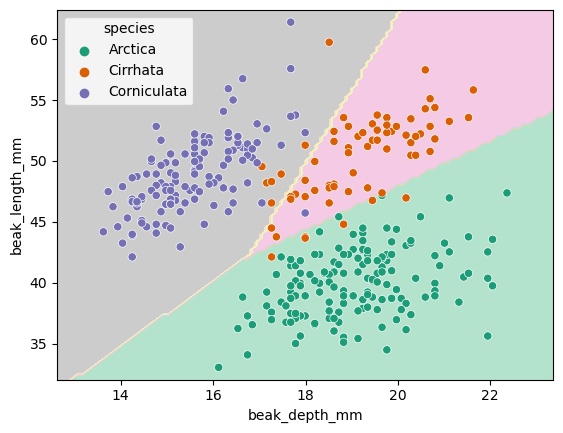

In [85]:
#plotting the model distribution
DecisionBoundaryDisplay.from_estimator(clf_2, x_subset, cmap="Pastel2")
sns.scatterplot(data=x_subset, x="beak_depth_mm", y="beak_length_mm", hue=y, palette="Dark2")

In [86]:
#this model produces same results as SCV with kernel set to linear parameter,  thus now lets fit all the features to the LinearSVC model 

In [87]:
#pipeline for setting the model
scaled_svc = make_pipeline(
    StandardScaler(),
    svm.LinearSVC(C=1.0, max_iter=10000, dual="auto")
)
scaled_svc

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual='auto', max_iter=10000))])

In [88]:
#splitting the data to train the data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)  # re-split using all columns

In [89]:
#fitting the data to the model
scaled_svc.fit(train_X, train_y)
#checking the score
scaled_svc.score(test_X, test_y)

0.9882352941176471

In [90]:

#setting the pipeline for model 
scaled_pca_svc = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),  # PCA with 2 components
    svm.LinearSVC(C=1.0, max_iter=10000, dual="auto")
)
scaled_pca_svc

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('linearsvc', LinearSVC(dual='auto', max_iter=10000))])

In [91]:
#fitting the data to model
scaled_pca_svc.fit(train_X, train_y)
#checking for the score 
scaled_pca_svc.score(test_X, test_y)

0.9176470588235294

In [92]:
#though we let the pipeline to choose the component but yet selecting just 2 component has reduced the score, now make a loop the fucntion to find the best number of components for the model

In [93]:
#obtaining the data for plotting
transformer_steps = scaled_pca_svc[:-1]  # all except the last step
knn_step = scaled_pca_svc[-1]  # only the last step

<Axes: xlabel='0', ylabel='1'>

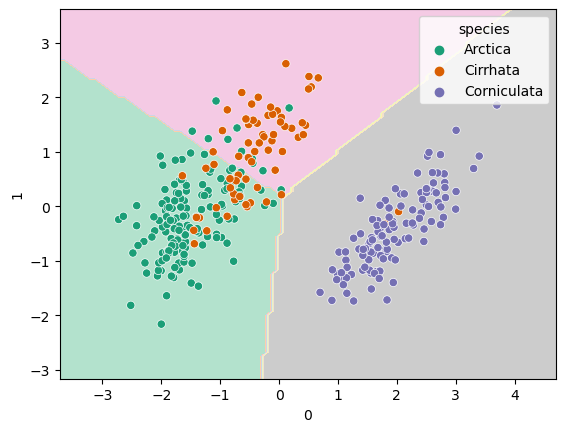

In [94]:
#dataset obtained
transformed_X = pd.DataFrame(transformer_steps.transform(X))
#plotting
DecisionBoundaryDisplay.from_estimator(knn_step, transformed_X, cmap="Pastel2")
sns.scatterplot(data=transformed_X, x=0, y=1, hue=y, palette="Dark2")

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#setting the model
scaled_pca_svm = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        PCA(),
        svm.LinearSVC(C=1.0, max_iter=10000, dual="auto")
        
    ),
    {
        "pca__n_components" : range(1, 4),
    }
)
scaled_pca_svm

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('linearsvc',
                                        LinearSVC(dual='auto',
                                                  max_iter=10000))]),
             param_grid={'pca__n_components': range(1, 4)})

In [96]:
#The visual distibution seems bit off 

In [97]:
#fitting the model
scaled_pca_svm.fit(train_X, train_y)
#fitting the data to the model 
scaled_pca_svm.score(test_X, test_y)

0.9882352941176471

In [98]:
#to check the number of component selected 
scaled_pca_svm.best_estimator_["pca"].n_components_

3

Summary :

The data analysis pipeline for the puffins dataset demonstrates a systematic approach to handling and analyzing the data, resulting in effective model performance. Initially, the dataset was loaded and explored, revealing features such as body_mass_kg, wing_length_m, beak_length_mm, and beak_depth_mm, with a target variable comprising three species of puffin birds. Missing values were addressed by filtering out incomplete rows, ensuring data cleanliness.

A subset `X` with features and `y` with the target were created for analysis. During exploration, it was noted that some features shared similar scales, leading to the creation of `x_subset` combining `beak_length_mm` and `beak_depth_mm`. Visualization of this subset indicated non-overlapping data points, suggesting suitability for modeling.

The initial model using `beak_length_mm` and `beak_depth_mm` yielded a commendable score of 0.97 due to the effective utilization of features with comparable scales. However, employing features with differing scales in subsequent iterations resulted in a score drop to 0.65, emphasizing the importance of feature scaling. Features with disparate scales can introduce bias, impacting model accuracy.

To address this, feature scaling techniques were implemented, significantly improving the score to 0.95 in the refined model. This reaffirmed the pivotal role of feature scaling in enhancing model performance and mitigating bias. Furthermore, the utilization of a pipeline incorporating all features, along with feature scaling and a kNN classifier, yielded an impressive score of 0.98, showcasing the pipeline's effectiveness in producing accurate predictive models and this model was found to be more efficient than others. The fitted model achieved a score of 0.98, and visualization seemed clearer compared to a similar pipeline but with an SVC classifier.

Furthermore, using a pipeline for preprocessing and model fitting streamlines the workflow and improves reproducibility. Additionally, evaluating model performance with accuracy scores quantifies predictive accuracy.
